# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 05/02/2023
* Student Name: Brian Blancato
* Student Net ID: bab3fq
* This URL: https://github.com/BrianBlancato/DS5100_Final_Project/blob/main/montecarlo_demo.ipynb
* GitHub Repo URL: https://github.com/BrianBlancato/DS5100_Final_Project

# The Monte Carlo Module

In [1]:
# A code block with your classes.

# Test Module

In [2]:
# A code block with your test code.

# Test Results

In [3]:
import unittest
from montecarlosimulator import montecarlo_tests

loader = unittest.TestLoader()
suite = loader.loadTestsFromModule(montecarlo_tests)
unittest.TextTestRunner().run(suite)

........
----------------------------------------------------------------------
Ran 8 tests in 0.030s

OK


Welcome to the Monte Carlo Simulator


<unittest.runner.TextTestResult run=8 errors=0 failures=0>

# Scenarios

 

## Scenario 1

In [4]:
import montecarlosimulator
import matplotlib.pyplot as plt

In [5]:
fair_coin = montecarlosimulator.Die(["H", "T"])

sc1_game1 = montecarlosimulator.Game([fair_coin, fair_coin, fair_coin, fair_coin, fair_coin])
sc1_game1.play(1000)

sc1_analyzer1 = montecarlosimulator.Analyzer(sc1_game1)

sc1_freq_1 = sc1_analyzer1.jackpot() / 1000

sc1_freq_1

0.071

In [6]:
unfair_coin = montecarlosimulator.Die(["H", "T"])
unfair_coin.change_weight("H", 5.0)

sc1_game2 = montecarlosimulator.Game([unfair_coin, unfair_coin, fair_coin, fair_coin, fair_coin])
sc1_game2.play(1000)

sc1_analyzer2 = montecarlosimulator.Analyzer(sc1_game2)

sc1_freq_2 = sc1_analyzer2.jackpot() / 1000

sc1_freq_2

0.105

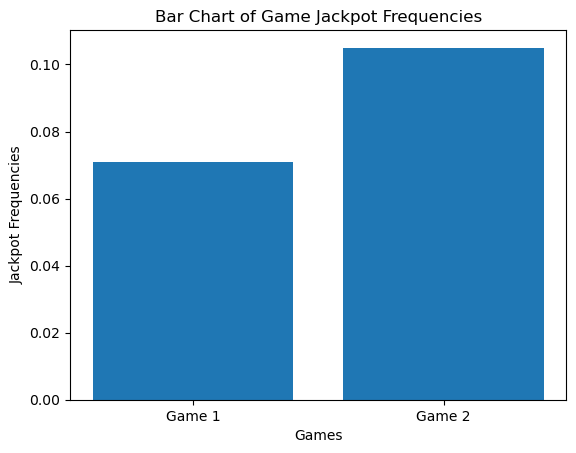

In [7]:
plt.bar(['Game 1', 'Game 2'], [sc1_freq_1, sc1_freq_2])
plt.title('Bar Chart of Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequencies')
plt.show()

## Scenario 2

In [8]:
import montecarlosimulator
import matplotlib.pyplot as plt

In [9]:
fair_die = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

sc2_game1 = montecarlosimulator.Game([fair_die, fair_die, fair_die, fair_die, fair_die])
sc2_game1.play(10000)

sc2_analyzer1 = montecarlosimulator.Analyzer(sc2_game1)

sc2_freq1 = sc2_analyzer1.jackpot() / 10000

sc2_freq1

0.001

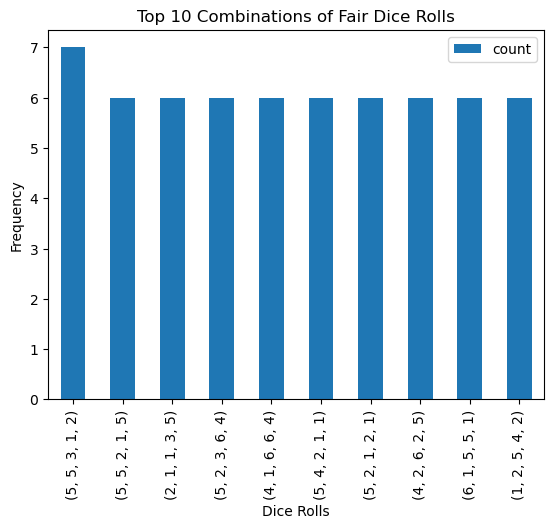

In [10]:
sc2_game1_top_combos = sc2_analyzer1.combo()
sc2_game1_top_10 = sc2_game1_top_combos.sort_values(by='count', ascending=False,).head(10)

sc2_game1_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Fair Dice Rolls")
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')

plt.show()

In [11]:
unfair_die_type1 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])
unfair_die_type2 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

unfair_die_type1.change_weight(6, 5)
unfair_die_type2.change_weight(1, 5)

sc2_game2 = montecarlosimulator.Game([unfair_die_type1, unfair_die_type1, unfair_die_type2, fair_die, fair_die])
sc2_game2.play(10000)

sc2_analyzer2 = montecarlosimulator.Analyzer(sc2_game2)

sc2_freq2 = sc2_analyzer2.jackpot() / 10000

sc2_freq2

0.0015

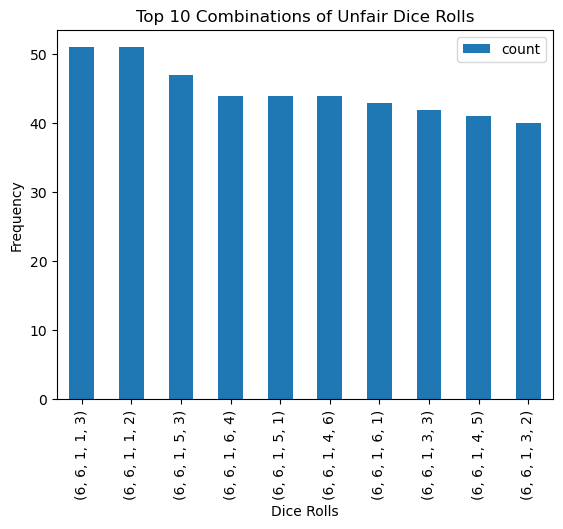

In [12]:
sc2_game2_top_combos = sc2_analyzer2.combo()
sc2_game2_top_10 = sc2_game2_top_combos.sort_values(by='count', ascending=False,).head(10)

sc2_game2_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Unfair Dice Rolls")
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')

plt.show()

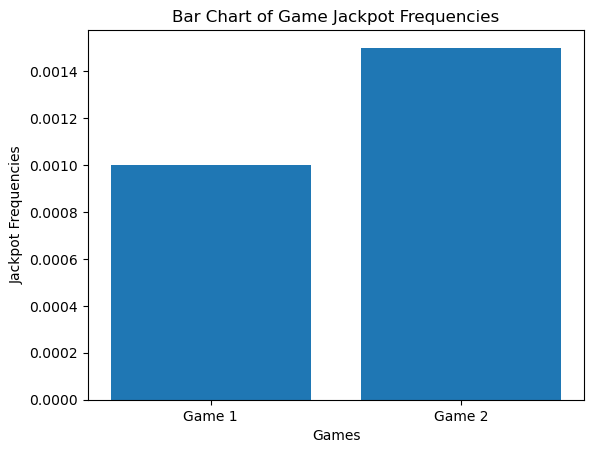

In [13]:
plt.bar(['Game 1', 'Game 2'], [sc2_freq1, sc2_freq2])
plt.title('Bar Chart of Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequencies')
plt.show()

## Scenario 3

In [14]:
import pandas as pd
import montecarlosimulator

In [15]:
# create the letter column and frequency column as lists
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
frequencies = [8.4966, 2.072, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034,
               7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671,
               0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902,
               1.7779, 0.2722]

# create the DataFrame
letter_freq_df = pd.DataFrame({'letter': letters, 'frequency': frequencies})

In [16]:
letter_array = letter_freq_df['letter'].values
letter_die = montecarlosimulator.Die(letter_array)

for face in letter_array:
    frequency = letter_freq_df.loc[letter_freq_df['letter'] == face, 'frequency'].values[0]
    letter_die.change_weight(face, frequency)
    
sc3_game = montecarlosimulator.Game([letter_die, letter_die, letter_die, letter_die, letter_die])
sc3_game.play(1000)

sc3_analyzer = montecarlosimulator.Analyzer(sc3_game)

sc3_combos = sc3_analyzer.combo()

In [17]:
pd.set_option('display.max_rows', None)
sc3_combos

count
1 2 3 4 5       
A A A Z N      1
    C N I      1
    E O N      1
    I E A      1
    S S A      1
    T N T      1
  B E D O      1
  C B R O      1
    D N C      1
      P E      1
    S A N      1
      C E      1
      E M      1
  D A F T      1
    M C R      1
    R D L      1
  E C I U      1
    E L E      1
    F R D      1
    G R I      1
    I X N      1
    L C N      1
    O M A      1
    P E R      1
    R H E      1
        R      1
      L D      1
    S C T      1
      E I      1
      I O      1
  F A M F      1
    E N N      1
    R A U      1
    S N R      1
    T V A      1
  G T K M      1
  H E X I      1
  I A L R      1
    B A E      1
      I A      1
    D A T      1
    E P L      1
    L N U      1
    T D L      1
  L A C A      1
    B N D      1
    E R S      1
    T C T      1
  M N P A      1
  N C M E      1
    T Y E      1
    W U S      1
    Y D N      1
  O E W T      1
    K L B      1
  P G E E      1
  R D E I      1
    I O T      1
    R C S      1
  S N O R      1
    V I R      1
  T C F R      1
    P I U      1
    U E E      1
  U A D A      1
    H T L      1
  V L P H      1
  W N N S      1
      O A      1
  Y T I D      1
B A W L N      1
  E A R R      1
    D E L      1
    G O T      1
    P L D      1
  I R S E      1
  N R U P      1
  O C E I      1
    R N L      1
  R C A Y      1
    U W K      1
  S R N R      1
  T E N T      1
    O L T      1
  U E R C      1
  Z N N D      1
C A A A I      1
    B U T      1
    E M V      1
    L I U      1
    P A A      1
    S R L      1
  B N I T      1
  C B W S      1
    R S A      1
    Y R N      1
  D I F E      1
      M E      1
  E A A A      1
      L R      1
    G R W      1
    P A E      1
    R F T      1
    S I I      1
      S E      1
    T H O      1
    U A A      1
  I A O E      1
    H T B      1
    N B E      1
      H I      1
    S P L      1
  K I O F      1
  L N P R      1
    S I H      1
  M G K S      1
    O O B      1
  N A I M      1
      R D      1
    E O G      1
    G S E      1
    N R T      1
    R D A      1
    T N A      1
  O A E N      1
      T M      1
    E G E      1
    P C A      1
    W M R      1
  P A E E      1
    Y E S      1
  R C F Y      1
    E T R      1
    N E C      1
    R U A      1
    T R S      1
  S A I L      1
    O S E      1
  T U O E      1
  U F S N      1
    R C S      1
  Y R B F      1
D A E I H      1
    Y E I      1
  B B I S      1
  C S C M      1
  E I B I      1
    L B M      1
    N S Y      1
    P M E      1
    R R R      1
    X W V      1
  F S A T      1
  I R E A      1
  L L E O      1
    M U N      1
  M S N N      1
  N E A E      1
  O H S S      1
    N E T      1
  P F E R      1
  R N A L      1
  S A P T      1
    N N C      1
  T L A R      1
    S W M      1
    U H E      1
  U A T B      1
    N O W      1
    O S N      1
    T A G      1
  V A W O      1
  W H H C      1
E A A D N      1
    D O R      1
    E M L      1
    N B S      1
      G C      1
    P S N      1
    U E T      1
    Y R U      1
  B A A N      1
      D R      1
      G O      1
    E L I      1
    P I A      1
  C A T H      1
    D P T      1
    E O R      1
    F R A      1
    I C F      1
    L W O      1
    R U O      1
  D A L C      1
    D S H      1
    E G E      1
    N M O      1
      U P      1
    R A I      1
  E G A N      1
    L R M      1
    R E T      1
    S O O      1
  F E B L      1
    H N U      1
    L A T      1
    U A O      1
  G D O E      1
    E N I      1
    T A A      1
  H O R H      1
    R E H      1
      N W      1
    T L A      1
  I A P T      1
    D F O      1
    E E S      1
    L H M      1
    M A A      1
    N E O      1
    P U R      1
  K U O O      1
  L I T B      1
    N N T      1
    O A I      1
    P S A      1
    R Y M      1
    T D I      1
      R E      1
    Y I R      1
  M I U I      1
    T F U      1
      N A      1
  N A O T      1

In [18]:
sc3_combos.to_csv('output.csv')

In [19]:
#I counted 7 amount of english words present in the rolls

english_words = 7

eng_word_freq = english_words / 1000

eng_word_freq

0.007

# Directory Listing



In [20]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 1616-9B9B

 Directory of D:\DS5100_Final_Project\DS5100_Final_Project

04/30/2023  10:52 PM    <DIR>          .
04/30/2023  10:52 PM    <DIR>          ..
04/27/2023  08:20 PM             3,238 .gitignore
04/30/2023  05:31 PM    <DIR>          .ipynb_checkpoints
04/27/2023  08:20 PM             1,091 LICENSE
04/30/2023  11:10 AM    <DIR>          montecarlosimulator
04/30/2023  10:52 PM    <DIR>          montecarlosimulator.egg-info
04/30/2023  10:52 PM           334,690 montecarlo_demo.ipynb
04/30/2023  10:52 PM            13,017 output.csv
04/30/2023  05:31 PM            35,787 project_scrapwork.ipynb
04/27/2023  08:20 PM                22 README.md
04/28/2023  11:30 PM               334 setup.py
               7 File(s)        388,179 bytes
               5 Dir(s)  1,386,127,015,936 bytes free


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [21]:
!pip install -e D:\DS5100_Final_Project\DS5100_Final_Project

Obtaining file:///D:/DS5100_Final_Project/DS5100_Final_Project
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: montecarlosimulator
    Found existing installation: montecarlosimulator 1.0.0
    Uninstalling montecarlosimulator-1.0.0:
      Successfully uninstalled montecarlosimulator-1.0.0
  Running setup.py develop for montecarlosimulator
